<a href="https://colab.research.google.com/github/dsiervo/topnews/blob/master/topNews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# install ktrain
!pip3 install ktrain

     |████████████████████████████████| 92kB 4.3MB/s 
     |████████████████████████████████| 1.0MB 14.1MB/s 
     |████████████████████████████████| 245kB 55.4MB/s 
     |████████████████████████████████| 1.8MB 51.9MB/s 
  Created wheel for ktrain: filename=ktrain-0.7.2-cp36-none-any.whl size=113492 sha256=4a0fa637d0811322105a158a8ffe15334905156ab6c55473a8b604b76f4a99d3
  Stored in directory: /root/.cache/pip/wheels/ed/db/bd/fb2cb12563e8a7e5ef04f99cc9014bc0e509f1bb3834e6ee5d
  Created wheel for keras-bert: filename=keras_bert-0.80.0-cp36-none-any.whl size=37923 sha256=b91b22b70b3402559fa4c283388f288e1cf7daa7c7c1126bb0bf84d581d99d67
  Stored in directory: /root/.cache/pip/wheels/63/dc/87/3260cb91f3aa32c0f85c5375429a30c8fd988bbb48f5ee21b0
  Created wheel for langdetect: filename=langdetect-1.0.7-cp36-none-any.whl size=993460 sha256=b9419f49655ce9fb204e36d4fb6ff3e745eca854bc4b9ba52d816ea1736356f1
  Stored in directory: /root/.cache/pip/wheels/ec/0c/a9/1647275e7ef5014e7b83ff30105180e33286

In [0]:
import ktrain
import tensorflow as tf
import pandas as pd
import numpy as np
import sklearn as sk

In [6]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/News_Category_Dataset_v2.json'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
df_ = pd.read_json(path, lines=True)

df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200853 entries, 0 to 200852
Data columns (total 6 columns):
category             200853 non-null object
headline             200853 non-null object
authors              200853 non-null object
link                 200853 non-null object
short_description    200853 non-null object
date                 200853 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.2+ MB


In [8]:
df_.head()

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26


In [9]:
df_['text'] = df_['authors']+' '+df_['headline'] +' '+ df_['short_description']

df = df_.drop(['link', 'date', 'headline', 'short_description', 'authors'], axis=1)

df.head()

,category,text
0,CRIME,Melissa Jeltsen There Were 2 Mass Shootings In...
1,ENTERTAINMENT,Andy McDonald Will Smith Joins Diplo And Nicky...
2,ENTERTAINMENT,Ron Dicker Hugh Grant Marries For The First Ti...
3,ENTERTAINMENT,Ron Dicker Jim Carrey Blasts 'Castrato' Adam S...
4,ENTERTAINMENT,Ron Dicker Julianna Margulies Uses Donald Trum...


In [10]:
df[df['category'] == 'PARENTING']['text'].iloc[20]

"Today's Mama, Contributor\nChanging diapers, minds and habits, sometimes all in one day Why I Stopped Helping My Son With His Homework We are sitting in traffic, rearranging our schedules and dodging our bosses in order to make it to everything we possibly can, and it turns out that may not be the best thing for our kids after all."

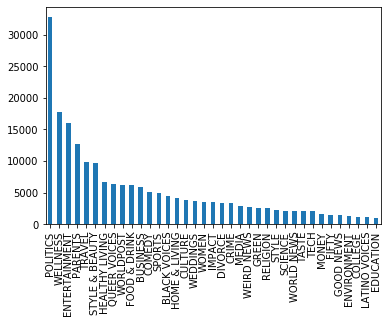

In [11]:
culture = ['ARTS & CULTURE', 'ARTS', 'CULTURE & ARTS']
worldpost = ['WORLDPOST', 'THE WORLDPOST']
parents = ['PARENTING', 'PARENTS']

df['category'][df['category'].isin(culture)] = "CULTURE"
df['category'][df['category'].isin(worldpost)] = "WORLDPOST"
df['category'][df['category'].isin(parents)] = "PARENTS"

df['category'].value_counts().plot(kind='bar')

In [0]:
X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(df['text'], df['category'])

In [13]:
len(X_train)+len(Y_train)

301278

In [0]:
"""
import os

def df_to_files(main_path, classes, x, y):

  if not os.path.exists(main_path):
      os.makedirs(main_path)
  
  for cl in classes:
    cl_path = main_path+'/'+cl
    if not os.path.exists(cl_path):
        os.makedirs(cl_path)

    for idx, (text, topic) in enumerate(zip(x,y)):
      file_name = str(idx)+'_.txt'
      full_path = main_path+'/'+topic+'/'+file_name
      print(full_path)
      with open(file_name,'w') as f:
        f.write(full_path)

#df_to_files('train', df.category.unique(), X_train, Y_train)
#!ls train/*
"""

In [0]:
cats = df.category.unique()
def cat_to_num(lab):
  return np.where(cats == lab)[0][0]



In [36]:
df['label'] = df['category'].apply(cat_to_num)
df.head(15)

,category,text,label
0,CRIME,Melissa Jeltsen There Were 2 Mass Shootings In...,0
1,ENTERTAINMENT,Andy McDonald Will Smith Joins Diplo And Nicky...,1
2,ENTERTAINMENT,Ron Dicker Hugh Grant Marries For The First Ti...,1
3,ENTERTAINMENT,Ron Dicker Jim Carrey Blasts 'Castrato' Adam S...,1
4,ENTERTAINMENT,Ron Dicker Julianna Margulies Uses Donald Trum...,1
5,ENTERTAINMENT,Ron Dicker Morgan Freeman 'Devastated' That Se...,1
6,ENTERTAINMENT,Ron Dicker Donald Trump Is Lovin' New McDonald...,1
7,ENTERTAINMENT,Todd Van Luling What To Watch On Amazon Prime ...,1
8,ENTERTAINMENT,Andy McDonald Mike Myers Reveals He'd 'Like To...,1
9,ENTERTAINMENT,Todd Van Luling What To Watch On Hulu That’s N...,1


In [30]:
cats

array(['CRIME', 'ENTERTAINMENT', 'WORLD NEWS', 'IMPACT', 'POLITICS',
       'WEIRD NEWS', 'BLACK VOICES', 'WOMEN', 'COMEDY', 'QUEER VOICES',
       'SPORTS', 'BUSINESS', 'TRAVEL', 'MEDIA', 'TECH', 'RELIGION',
       'SCIENCE', 'LATINO VOICES', 'EDUCATION', 'COLLEGE', 'PARENTS',
       'CULTURE', 'STYLE', 'GREEN', 'TASTE', 'HEALTHY LIVING',
       'WORLDPOST', 'GOOD NEWS', 'FIFTY', 'WELLNESS', 'HOME & LIVING',
       'STYLE & BEAUTY', 'DIVORCE', 'WEDDINGS', 'FOOD & DRINK', 'MONEY',
       'ENVIRONMENT'], dtype=object)